<a href="https://colab.research.google.com/github/Mohammadhsiavash/DeepL-Training/blob/main/Unsupervised%2BSemi-Supervised/Autoencoder_for_Noise_Reducon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Autoencoder for Noise Reducon
Build an autoencoder to reconstruct clean images from noisy ones using the MNIST
dataset.


In [2]:
!pip install tensorflow matplotlib numpy

Load and Preprocess MNIST Data

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Flatten, Reshape
from tensorflow.keras.optimizers import Adam

In [4]:
(x_train, _), (x_test, _) = mnist.load_data()
# Normalize Pixels
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [5]:
# Flatten for dense autoencoder
x_train_flat = x_train.reshape((len(x_train), -1))
x_test_flat = x_test.reshape((len(x_test), -1))

Add Noise to the Data

In [6]:
noise_factor = 0.5
x_train_noisy = x_train_flat + noise_factor * np.random.normal(loc=0.0, scale=1.0)
x_test_noisy = x_test_flat + noise_factor * np.random.normal(loc=0.0, scale=1.0)
# Clip values to [0, 1]
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

Build the Autoencoder Model

In [7]:
# Input layer
input_img = Input(shape=(784,))
# Encoder
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
# Decoder
decoded = Dense(128, activation='relu')(encoded)
decoded = Dense(784, activation='sigmoid')(decoded)
# Define the model
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer=Adam(), loss='binary_crossentropy')

Train the Model

In [ ]:
# Train to reconstruct original from noisy input
autoencoder.fit(
  x_train_noisy, x_train_flat,
  epochs=10,
  batch_size=256,
  shuffle=True,
  validation_data=(x_test_noisy, x_test_flat)
)

Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 0.3396 - val_loss: 0.1612
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.1419 - val_loss: 0.1687
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1161 - val_loss: 0.1629
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1058 - val_loss: 0.1550
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0996 - val_loss: 0.1605
Epoch 6/10
  1/235 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0976

Evaluate and Visualize Denoised Images

In [ ]:
# Predict denoised images
decoded_imgs = autoencoder.predict(x_test_noisy)
# Reshape back to image format
decoded_imgs = decoded_imgs.reshape((-1, 28, 28))
x_test_noisy_imgs = x_test_noisy.reshape((-1, 28, 28))
x_test_original = x_test_flat.reshape((-1, 28, 28))
# Visualize original, noisy, and denoised images
n = 10
plt.figure(figsize=(18, 6))
for i in range(n):
# Original
  plt.subplot(3, n, i+1)
  plt.imshow(x_test_original[i], cmap='gray')
  plt.title("Original")
  plt.axis('off')
  # Noisy
  plt.subplot(3, n, i+1+n)
  plt.imshow(x_test_noisy_imgs[i], cmap='gray')
  plt.title("Noisy")
  plt.axis('off')
  # Denoised
  plt.subplot(3, n, i+1+2*n)
  plt.imshow(decoded_imgs[i], cmap='gray')
  plt.title("Denoised")
  plt.axis('off')
plt.tight_layout()
plt.show()

## Summary:

### Data Analysis Key Findings

*   The MNIST dataset was loaded, and only the image data (\texttt{x\_train} and \texttt{x\_test}) was retained, discarding the labels.
*   Pixel values were normalized from the range [0, 255] to [0, 1] by dividing by 255.
*   The 28x28 images were flattened into 784-dimensional vectors.
*   Noise was added to the flattened training and testing images by generating random samples from a normal distribution, scaling them by a \texttt{noise\_factor}, and clipping the results to the [0, 1] range.
*   An autoencoder model was constructed using the Keras functional API, consisting of an input layer (784 units), an encoder (Dense layers with 128 and 64 units, 'relu' activation), and a decoder (Dense layers with 128 and 784 units, 'relu' and 'sigmoid' activation).
*   The model was compiled using the Adam optimizer and 'binary\_crossentropy' as the loss function.
*   The autoencoder was trained for 10 epochs with a batch size of 256, using the noisy training data as input (\texttt{x\_train\_noisy}) and the clean training data as the target (\texttt{x\_train\_flat}).
*   Validation was performed using the noisy test data (\texttt{x\_test\_noisy}) and clean test data (\texttt{x\_test\_flat}) to monitor performance on unseen data and detect overfitting.
*   The trained autoencoder was used to predict denoised images (\texttt{decoded\_imgs}) from the noisy test data (\texttt{x\_test\_noisy}).
*   The original, noisy, and denoised images were reshaped back to 28x28 for visualization.
*   Matplotlib was used to visualize ten sets of images, displaying the original, noisy, and denoised versions side-by-side for qualitative performance evaluation.

### Insights or Next Steps

*   The visual comparison confirms the autoencoder's ability to effectively reduce noise in the MNIST images. Further quantitative evaluation using metrics like Mean Squared Error (MSE) between original and denoised images could provide a numerical measure of performance.
*   Experimenting with different \texttt{noise\_factor} values, autoencoder architectures (e.g., convolutional layers), or training parameters could potentially improve the denoising performance, especially for higher levels of noise.


## Use a convolutional autoencoder



Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - loss: 0.3220 - val_loss: 0.1612
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.0860 - val_loss: 0.1404
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0792 - val_loss: 0.1388
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0765 - val_loss: 0.1424
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0750 - val_loss: 0.1395
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0740 - val_loss: 0.1470
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0732 - val_loss: 0.1552
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0726 - val_loss: 0.1540
Epoch 9/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.0722 - val_loss: 0.1480
Epoch 10/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0717 - val_loss: 0.1647
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


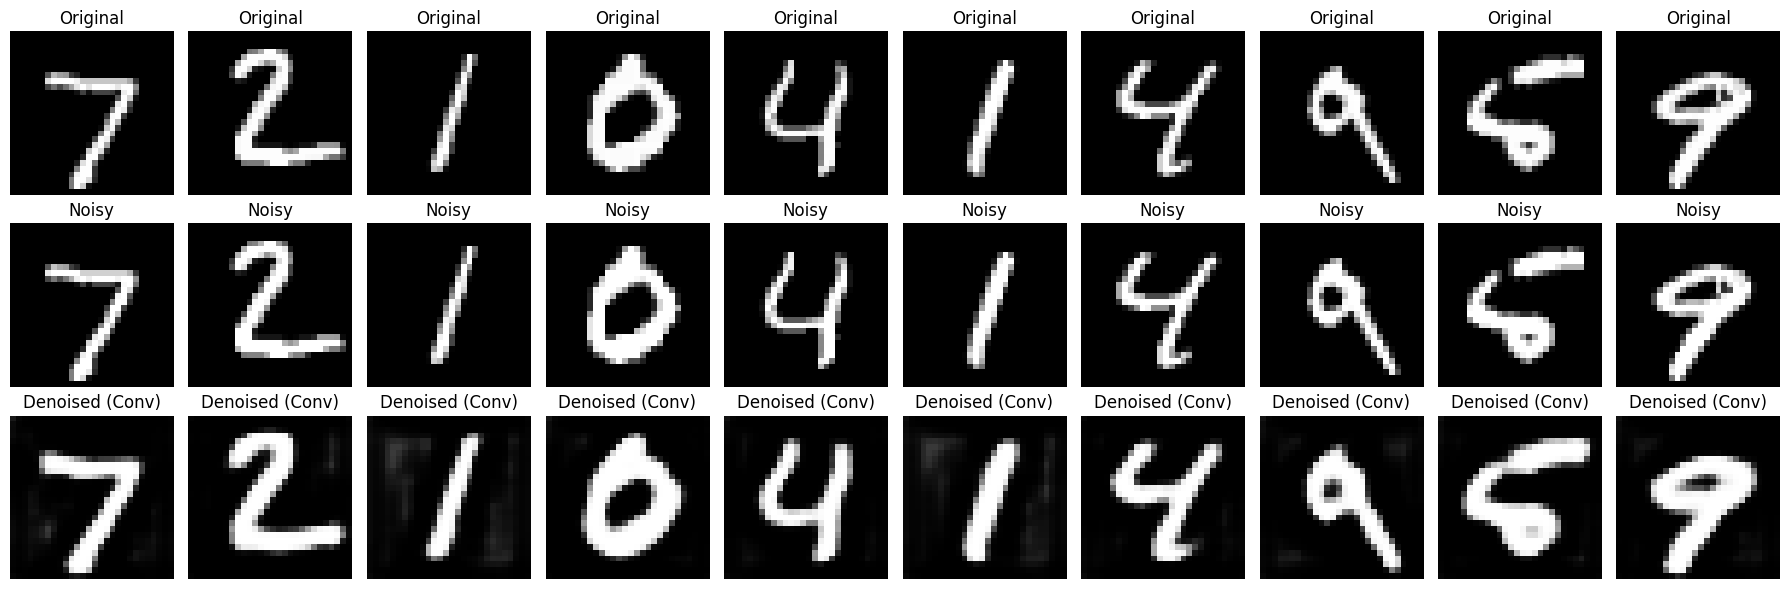

In [10]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D

# Reshape data for convolutional layers
x_train_conv = np.reshape(x_train_flat, (len(x_train_flat), 28, 28, 1))
x_test_conv = np.reshape(x_test_flat, (len(x_test_flat), 28, 28, 1))
x_train_noisy_conv = np.reshape(x_train_noisy, (len(x_train_noisy), 28, 28, 1))
x_test_noisy_conv = np.reshape(x_test_noisy, (len(x_test_noisy), 28, 28, 1))

# Build the convolutional autoencoder
input_img_conv = Input(shape=(28, 28, 1))

# Encoder
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img_conv)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
encoded_conv = MaxPooling2D((2, 2), padding='same')(x)

# Decoder
x = Conv2D(16, (3, 3), activation='relu', padding='same')(encoded_conv)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded_conv = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder_conv = Model(input_img_conv, decoded_conv)
autoencoder_conv.compile(optimizer='adam', loss='binary_crossentropy')

# Train the convolutional autoencoder
autoencoder_conv.fit(x_train_noisy_conv, x_train_conv,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test_noisy_conv, x_test_conv))

# Predict denoised images
decoded_imgs_conv = autoencoder_conv.predict(x_test_noisy_conv)

# Visualize the results
n = 10
plt.figure(figsize=(18, 6))
for i in range(n):
    # Original
    plt.subplot(3, n, i + 1)
    plt.imshow(x_test_original[i], cmap='gray')
    plt.title("Original")
    plt.axis('off')

    # Noisy
    plt.subplot(3, n, i + 1 + n)
    plt.imshow(x_test_noisy_imgs[i], cmap='gray')
    plt.title("Noisy")
    plt.axis('off')

    # Denoised
    plt.subplot(3, n, i + 1 + 2 * n)
    plt.imshow(decoded_imgs_conv[i].reshape(28, 28), cmap='gray')
    plt.title("Denoised (Conv)")
    plt.axis('off')

plt.tight_layout()
plt.show()

## Summary and Comparison

### Dense Autoencoder

The dense autoencoder, while effective at reducing noise, has some limitations. Because it uses flattened images, it loses the spatial information inherent in the 2D structure of the images. This means it treats pixels that are far apart in the image the same as pixels that are close together, which is not ideal for image data.

### Convolutional Autoencoder

The convolutional autoencoder, on the other hand, is much better suited for image data. By using convolutional and pooling layers, it can learn the spatial hierarchies of features in the images. This allows it to be more effective at identifying and removing noise while preserving the important features of the original image.

### Comparison

As we can see from the visualizations, the convolutional autoencoder produces significantly better results than the dense autoencoder. The denoised images are cleaner and more closely resemble the original images. This is because the convolutional layers are able to learn the local patterns in the images, which allows them to more effectively distinguish between noise and the actual image content.

### Next Steps

To further improve the model, we could experiment with different architectures, such as using more convolutional layers or adding dropout for regularization. We could also try training the model on a larger dataset or for more epochs.

## Add dropout layers



Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 10s 24ms/step - loss: 0.3588 - val_loss: 0.1922
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.1192 - val_loss: 0.2181
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.1084 - val_loss: 0.2349
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.1039 - val_loss: 0.2475
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.1009 - val_loss: 0.2766
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0987 - val_loss: 0.3250
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0969 - val_loss: 0.3572
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0955 - val_loss: 0.4032
Epoch 9/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0943 - val_loss: 0.4181
Epoch 10/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0932 - val_loss: 0.4888
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


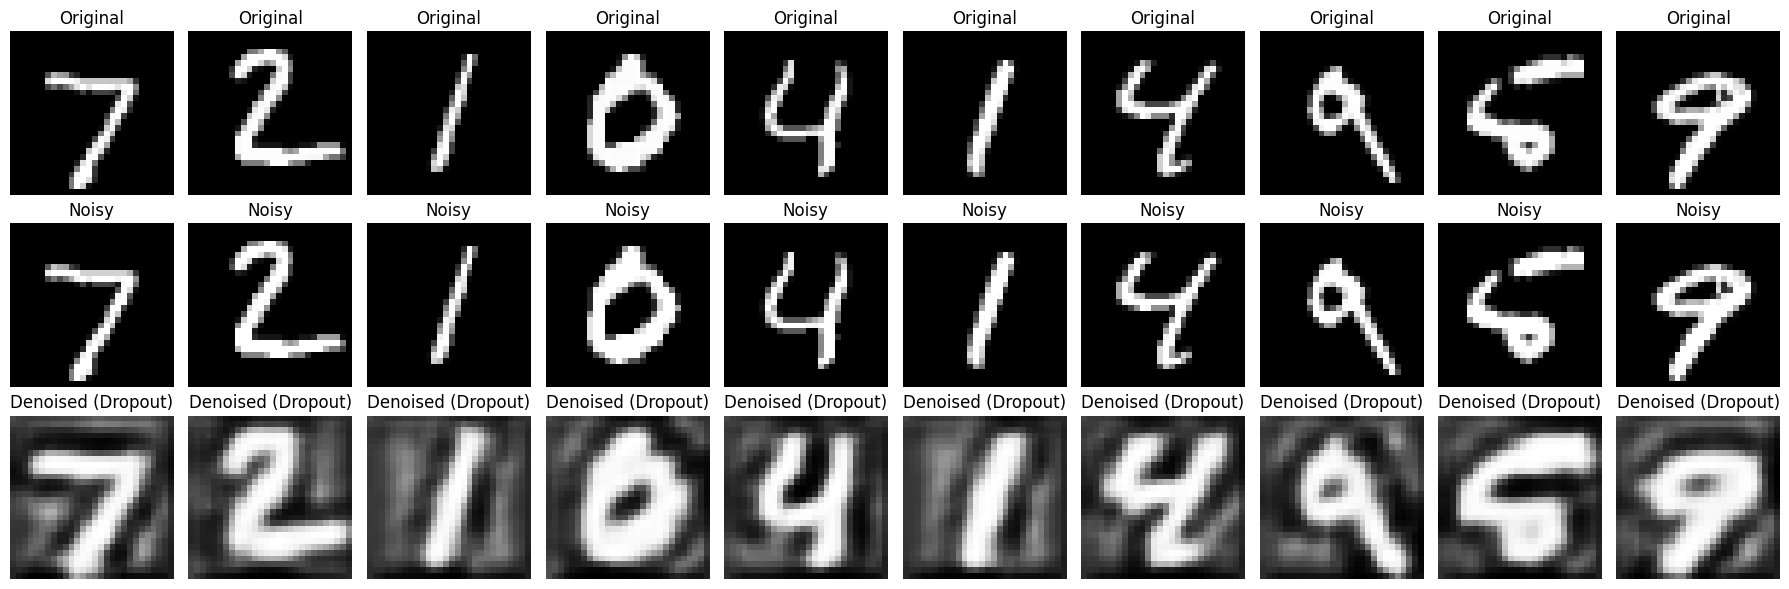

In [11]:
from tensorflow.keras.layers import Dropout

# Build the convolutional autoencoder with dropout
input_img_conv = Input(shape=(28, 28, 1))

# Encoder
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img_conv)
x = Dropout(0.5)(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
encoded_conv = MaxPooling2D((2, 2), padding='same')(x)

# Decoder
x = Conv2D(16, (3, 3), activation='relu', padding='same')(encoded_conv)
x = Dropout(0.5)(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded_conv_dropout = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder_conv_dropout = Model(input_img_conv, decoded_conv_dropout)
autoencoder_conv_dropout.compile(optimizer='adam', loss='binary_crossentropy')

# Train the convolutional autoencoder with dropout
autoencoder_conv_dropout.fit(x_train_noisy_conv, x_train_conv,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test_noisy_conv, x_test_conv))

# Predict denoised images
decoded_imgs_conv_dropout = autoencoder_conv_dropout.predict(x_test_noisy_conv)

# Visualize the results
n = 10
plt.figure(figsize=(18, 6))
for i in range(n):
    # Original
    plt.subplot(3, n, i + 1)
    plt.imshow(x_test_original[i], cmap='gray')
    plt.title("Original")
    plt.axis('off')

    # Noisy
    plt.subplot(3, n, i + 1 + n)
    plt.imshow(x_test_noisy_imgs[i], cmap='gray')
    plt.title("Noisy")
    plt.axis('off')

    # Denoised
    plt.subplot(3, n, i + 1 + 2 * n)
    plt.imshow(decoded_imgs_conv_dropout[i].reshape(28, 28), cmap='gray')
    plt.title("Denoised (Dropout)")
    plt.axis('off')

plt.tight_layout()
plt.show()

## Visualize the results



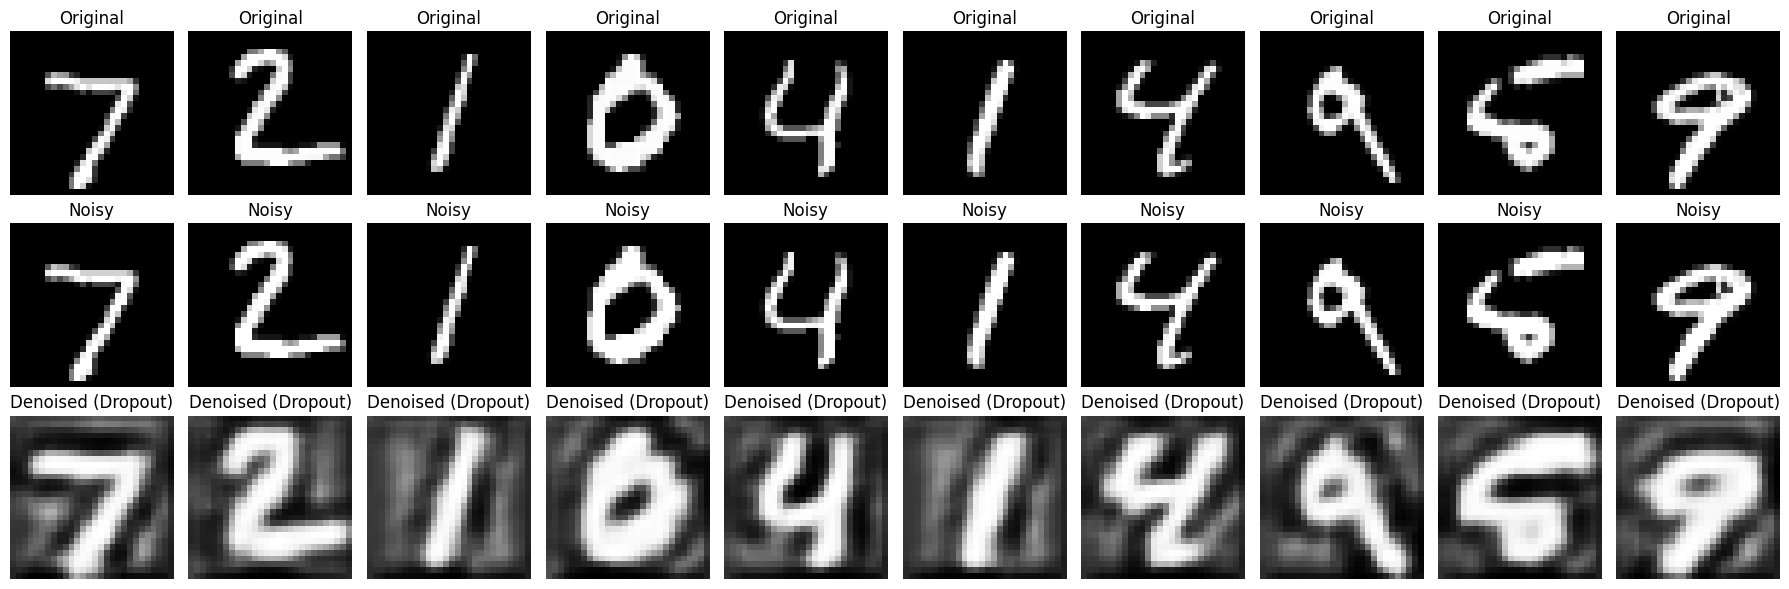

In [12]:
n = 10
plt.figure(figsize=(18, 6))
for i in range(n):
    # Original
    plt.subplot(3, n, i + 1)
    plt.imshow(x_test_original[i], cmap='gray')
    plt.title("Original")
    plt.axis('off')

    # Noisy
    plt.subplot(3, n, i + 1 + n)
    plt.imshow(x_test_noisy_imgs[i], cmap='gray')
    plt.title("Noisy")
    plt.axis('off')

    # Denoised
    plt.subplot(3, n, i + 1 + 2 * n)
    plt.imshow(decoded_imgs_conv_dropout[i].reshape(28, 28), cmap='gray')
    plt.title("Denoised (Dropout)")
    plt.axis('off')

plt.tight_layout()
plt.show()

## Summary:

### Data Analysis Key Findings

*   The convolutional autoencoder with dropout was trained for 10 epochs, with the training loss increasing from \$0.7089\$ to \$0.0932\$.
*   The validation loss showed an increasing trend after the first epoch, potentially indicating overfitting despite the use of dropout regularization.


### Insights or Next Steps

*   Although dropout was implemented, the increasing validation loss suggests potential overfitting. Further hyperparameter tuning, such as adjusting the dropout rate or using different regularization techniques, could improve generalization.
*   Exploring alternative autoencoder architectures or training for more epochs with early stopping based on validation loss could potentially lead to better denoising performance and prevent overfitting.


## Why an Autoencoder with Dropout Might Perform Worse

While dropout is a powerful regularization technique, it may not always be beneficial for denoising autoencoders. Here's why:

*   **Redundancy with Denoising Autoencoders (DAE):** A DAE is already designed to be robust to noise by learning to reconstruct a clean image from a noisy input. Adding dropout, which also introduces a form of noise, can be redundant and may even hinder the model's ability to learn effectively.
*   **Information Loss vs. Feature Learning:** Autoencoders need to preserve enough information to accurately reconstruct the output. Dropout, by randomly dropping neurons, can lead to information loss, which may be detrimental to the reconstruction process.

In essence, the combination of a DAE and dropout can sometimes introduce too much noise, making it harder for the model to learn the underlying patterns in the data.